<a href="https://colab.research.google.com/github/Jashanpreet645/Topsis-for-Pretrained-Models-Predictive-analysis-/blob/main/assignment-6%20Topsis-for-Pretrained-Models%20Public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

data = {
    "Model": ["BART", "T5", "PEGASUS", "DistilBART", "FLAN-T5"],
    "ROUGE-1": [44, 42, 45, 41, 43],
    "ROUGE-L": [41, 39, 42, 38, 40],
    "Inference_Time": [0.90, 0.75, 1.20, 0.50, 0.70],
    "Model_Size": [1600, 850, 2200, 800, 900]
}

df = pd.DataFrame(data)
models = df["Model"]
matrix = df.iloc[:, 1:].values

weights = np.array([0.35, 0.35, 0.15, 0.15])
impacts = np.array([1, 1, -1, -1])

norm_matrix = matrix / np.sqrt((matrix**2).sum(axis=0))
weighted_matrix = norm_matrix * weights

ideal_best = np.max(weighted_matrix * impacts, axis=0)
ideal_worst = np.min(weighted_matrix * impacts, axis=0)

dist_best = np.sqrt(((weighted_matrix - ideal_best)**2).sum(axis=1))
dist_worst = np.sqrt(((weighted_matrix - ideal_worst)**2).sum(axis=1))

topsis_score = dist_worst / (dist_best + dist_worst)

df["TOPSIS_Score"] = topsis_score
df["Rank"] = df["TOPSIS_Score"].rank(ascending=False)

df = df.sort_values(by="TOPSIS_Score", ascending=False)

print(df)

        Model  ROUGE-1  ROUGE-L  Inference_Time  Model_Size  TOPSIS_Score  \
3  DistilBART       41       38            0.50         800      0.637058   
4     FLAN-T5       43       40            0.70         900      0.627718   
1          T5       42       39            0.75         850      0.624998   
0        BART       44       41            0.90        1600      0.607286   
2     PEGASUS       45       42            1.20        2200      0.591080   

   Rank  
3   1.0  
4   2.0  
1   3.0  
0   4.0  
2   5.0  


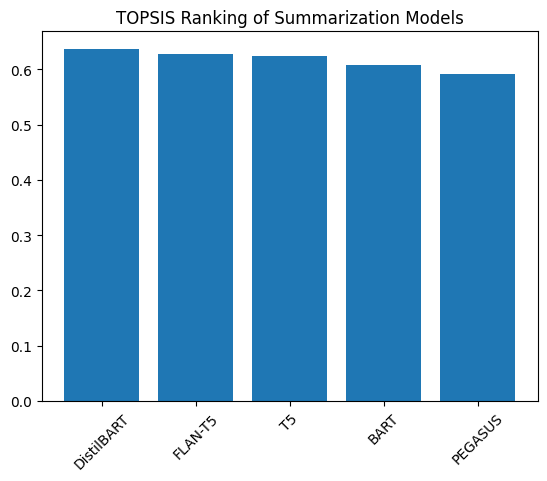

In [5]:
import matplotlib.pyplot as plt

plt.bar(df["Model"], df["TOPSIS_Score"])
plt.title("TOPSIS Ranking of Summarization Models")
plt.xticks(rotation=45)
plt.show()